In [1]:
import pandas as pd
import math

In [2]:
DATA_DIR = ''

In [3]:
all_data = pd.read_csv(DATA_DIR + 'all_matches_details.csv')

In [4]:
all_data.columns

Index(['innings', 'delivery_no', 'delivery_no_over', 'non_striker', 'bowler',
       'runs_extras', 'runs_total', 'runs_batsman', 'batsman', 'player_out',
       'player_out_kind', 'match_no'],
      dtype='object')

In [5]:
all_data.head()

,innings,delivery_no,delivery_no_over,non_striker,bowler,runs_extras,runs_total,runs_batsman,batsman,player_out,player_out_kind,match_no
0,1st innings,0,0.1,Shubman Gill,TA Boult,0,0,0,RA Tripathi,NaN,NaN,1216526
1,1st innings,1,0.2,Shubman Gill,TA Boult,0,1,1,RA Tripathi,NaN,NaN,1216526
2,1st innings,2,0.3,RA Tripathi,TA Boult,0,0,0,Shubman Gill,NaN,NaN,1216526
3,1st innings,3,0.4,RA Tripathi,TA Boult,1,1,0,Shubman Gill,NaN,NaN,1216526
4,1st innings,4,0.5,RA Tripathi,TA Boult,0,0,0,Shubman Gill,NaN,NaN,1216526


# Total Runs

In [6]:
batsman_runs = all_data.groupby(["batsman"])["runs_batsman"].sum()

In [7]:
batsman_runs = batsman_runs.reset_index( name = 'batsman_runs').sort_values( by = 'batsman_runs',ascending = False) 

In [8]:
batsman_runs.head()

,batsman,batsman_runs
53,KL Rahul,670
99,S Dhawan,618
20,DA Warner,548
113,SS Iyer,519
35,Ishan Kishan,516


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20,
             xlabel_name = "",
             ylabel_name = "",
             title_name = ""):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

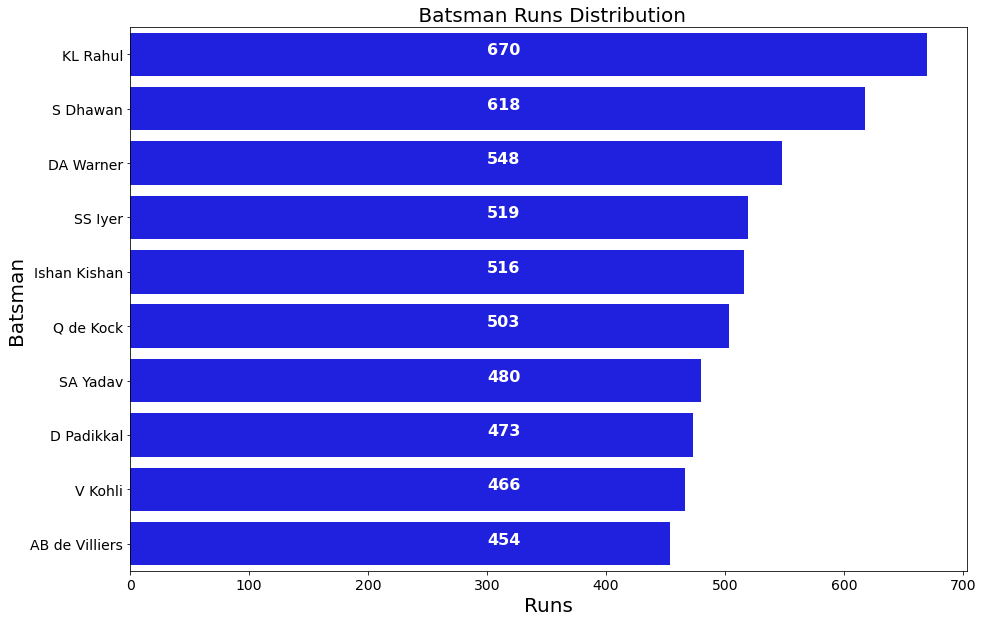

In [10]:
xlabel_name = "Runs"
ylabel_name = "Batsman"
title_name = " Batsman Runs Distribution"

sns.barplot( x = "batsman_runs" , y = "batsman" , data = batsman_runs.head(10), color = "blue")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_runs.head(10)["batsman_runs"].values):
    ax.text(300, i, v,fontsize=16,color='white',weight='bold')

# Matches

In [11]:
batsman_matches = all_data[["batsman","match_no"]]

In [12]:
batsman_matches_count = batsman_matches.drop_duplicates().groupby(["batsman"])["batsman"].count() \
.reset_index( name = 'batsman_matches')

In [13]:
batsman_matches_count

,batsman,batsman_matches
0,A Nortje,3
1,AB de Villiers,14
2,AD Russell,9
3,AJ Finch,12
4,AJ Tye,1
...,...,...
128,VR Aaron,2
129,WP Saha,4
130,Washington Sundar,9
131,YBK Jaiswal,3


In [14]:
batsman_all_stats = batsman_runs.merge(batsman_matches_count)

In [15]:
batsman_all_stats

,batsman,batsman_runs,batsman_matches
0,KL Rahul,670,14
1,S Dhawan,618,17
2,DA Warner,548,16
3,SS Iyer,519,17
4,Ishan Kishan,516,13
...,...,...,...
128,SS Cottrell,0,1
129,B Kumar,0,1
130,Arshdeep Singh,0,1
131,SP Goswami,0,2


# Player Outs

In [16]:
batsman_outs = all_data[["batsman","player_out"]]
len(batsman_outs["player_out"].unique())

123

In [17]:
batsman_outs = batsman_outs.groupby("batsman")["player_out"].count()\
.reset_index( name = 'player_out').sort_values( by = 'player_out',ascending = False) 

In [18]:
batsman_outs = batsman_outs.replace(0, 1)
batsman_outs

,batsman,player_out
113,SS Iyer,16
66,MP Stoinis,15
93,RG Sharma,15
19,D Padikkal,14
99,S Dhawan,14
...,...,...
117,Shahbaz Ahmed,1
60,M Prasidh Krishna,1
91,RD Chahar,1
80,P Dubey,1


# Fours

In [19]:
all_data_four_runs = all_data[(all_data["runs_batsman"] == 4)]

In [20]:
batsman_fours = all_data_four_runs.groupby(["batsman"])["batsman"].count() \
.reset_index( name = 'batsman_fours').sort_values( by = 'batsman_fours',ascending = False) 

In [21]:
batsman_fours

,batsman,batsman_fours
74,S Dhawan,67
78,SA Yadav,61
37,KL Rahul,58
13,DA Warner,52
12,D Padikkal,51
...,...,...
77,S Nadeem,1
69,RK Singh,1
36,KL Nagarkoti,1
40,Kuldeep Yadav,1


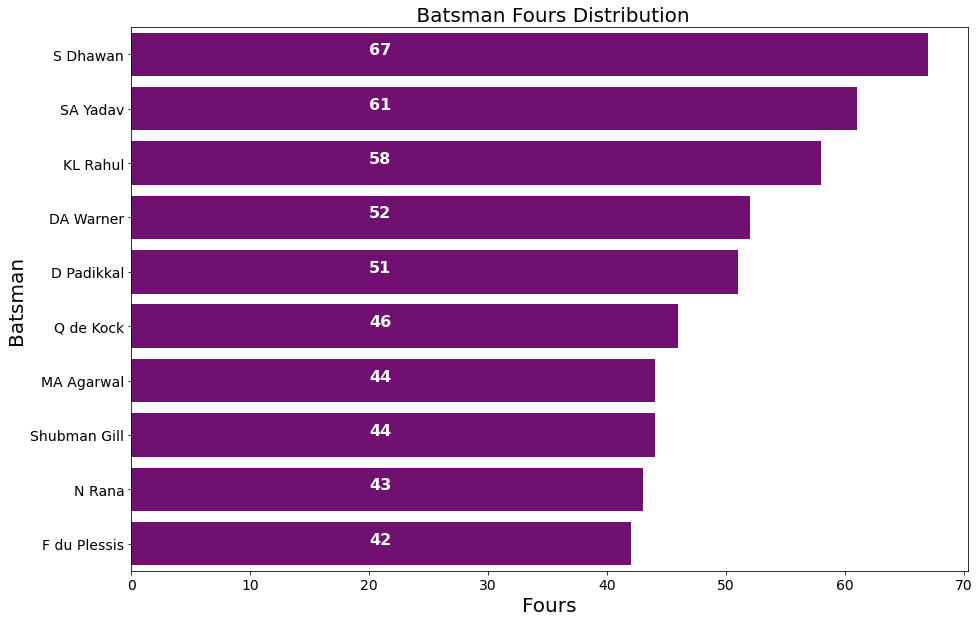

In [22]:
xlabel_name = "Fours"
ylabel_name = "Batsman"
title_name = " Batsman Fours Distribution"

sns.barplot( x = "batsman_fours" , y = "batsman" , data = batsman_fours.head(10), color = "purple")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_fours.head(10)["batsman_fours"].values):
    ax.text(20, i, v,fontsize=16,color='white',weight='bold')

# Six

In [23]:
all_data_six_runs = all_data[(all_data["runs_batsman"] == 6)]

In [24]:
batsman_six = all_data_six_runs.groupby(["batsman"])["batsman"].count() \
.reset_index( name = 'batsman_six').sort_values( by = 'batsman_six',ascending = False) 

In [25]:
batsman_six

,batsman,batsman_six
21,Ishan Kishan,30
68,SV Samson,26
42,N Pooran,25
19,HH Pandya,25
17,EJG Morgan,24
...,...,...
27,JR Philippe,1
74,V Shankar,1
24,JDS Neesham,1
20,I Udana,1


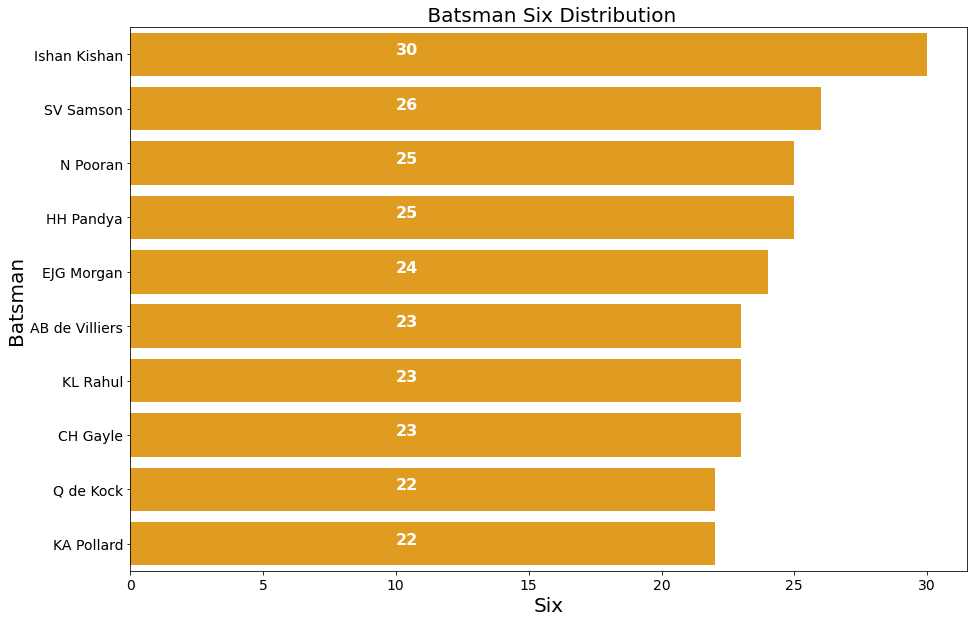

In [26]:
xlabel_name = "Six"
ylabel_name = "Batsman"
title_name = " Batsman Six Distribution"

sns.barplot( x = "batsman_six" , y = "batsman" , data = batsman_six.head(10), color = "orange")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_six.head(10)["batsman_six"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')

In [27]:
batsman_all_stats = batsman_all_stats.merge(batsman_fours,how = "left")

In [28]:
batsman_all_stats

,batsman,batsman_runs,batsman_matches,batsman_fours
0,KL Rahul,670,14,58.0
1,S Dhawan,618,17,67.0
2,DA Warner,548,16,52.0
3,SS Iyer,519,17,40.0
4,Ishan Kishan,516,13,36.0
...,...,...,...,...
128,SS Cottrell,0,1,NaN
129,B Kumar,0,1,NaN
130,Arshdeep Singh,0,1,NaN
131,SP Goswami,0,2,NaN


In [29]:
batsman_all_stats = batsman_all_stats.merge(batsman_six,how = "left")

In [30]:
batsman_all_stats

,batsman,batsman_runs,batsman_matches,batsman_fours,batsman_six
0,KL Rahul,670,14,58.0,23.0
1,S Dhawan,618,17,67.0,13.0
2,DA Warner,548,16,52.0,14.0
3,SS Iyer,519,17,40.0,16.0
4,Ishan Kishan,516,13,36.0,30.0
...,...,...,...,...,...
128,SS Cottrell,0,1,NaN,NaN
129,B Kumar,0,1,NaN,NaN
130,Arshdeep Singh,0,1,NaN,NaN
131,SP Goswami,0,2,NaN,NaN


# Average , Strike Rate

In [31]:
batsman_del = all_data.groupby(["batsman"])["runs_batsman"].count() \
.reset_index( name = 'deliveries').sort_values( by = 'deliveries',ascending = False) 

In [32]:
batsman_del

,batsman,deliveries
53,KL Rahul,525
99,S Dhawan,433
113,SS Iyer,433
20,DA Warner,422
126,V Kohli,400
...,...,...
13,B Kumar,2
50,KK Ahmed,2
122,TA Boult,1
117,Shahbaz Ahmed,1


In [33]:
batsman_outs

,batsman,player_out
113,SS Iyer,16
66,MP Stoinis,15
93,RG Sharma,15
19,D Padikkal,14
99,S Dhawan,14
...,...,...
117,Shahbaz Ahmed,1
60,M Prasidh Krishna,1
91,RD Chahar,1
80,P Dubey,1


In [34]:
batsman_all_stats = batsman_all_stats.merge(batsman_del,how = "left")
batsman_all_stats = batsman_all_stats.merge(batsman_outs,how = "left")

In [35]:
batsman_all_stats

,batsman,batsman_runs,batsman_matches,batsman_fours,batsman_six,deliveries,player_out
0,KL Rahul,670,14,58.0,23.0,525,13
1,S Dhawan,618,17,67.0,13.0,433,14
2,DA Warner,548,16,52.0,14.0,422,13
3,SS Iyer,519,17,40.0,16.0,433,16
4,Ishan Kishan,516,13,36.0,30.0,361,9
...,...,...,...,...,...,...,...
128,SS Cottrell,0,1,NaN,NaN,2,1
129,B Kumar,0,1,NaN,NaN,2,1
130,Arshdeep Singh,0,1,NaN,NaN,3,1
131,SP Goswami,0,2,NaN,NaN,5,2


In [36]:
batsman_all_stats["average"] = round(batsman_all_stats["batsman_runs"] / batsman_all_stats["player_out"],2)

In [37]:
batsman_all_stats["strike_rate"] =round(batsman_all_stats["batsman_runs"]  / batsman_all_stats["deliveries"] *100,2)

In [38]:
batsman_all_stats

,batsman,batsman_runs,batsman_matches,batsman_fours,batsman_six,deliveries,player_out,average,strike_rate
0,KL Rahul,670,14,58.0,23.0,525,13,51.54,127.62
1,S Dhawan,618,17,67.0,13.0,433,14,44.14,142.73
2,DA Warner,548,16,52.0,14.0,422,13,42.15,129.86
3,SS Iyer,519,17,40.0,16.0,433,16,32.44,119.86
4,Ishan Kishan,516,13,36.0,30.0,361,9,57.33,142.94
...,...,...,...,...,...,...,...,...,...
128,SS Cottrell,0,1,NaN,NaN,2,1,0.00,0.00
129,B Kumar,0,1,NaN,NaN,2,1,0.00,0.00
130,Arshdeep Singh,0,1,NaN,NaN,3,1,0.00,0.00
131,SP Goswami,0,2,NaN,NaN,5,2,0.00,0.00


In [39]:
batsman_all_stats.columns

Index(['batsman', 'batsman_runs', 'batsman_matches', 'batsman_fours',
       'batsman_six', 'deliveries', 'player_out', 'average', 'strike_rate'],
      dtype='object')

In [40]:
batsman_all_stats_5 = batsman_all_stats[['batsman_runs', 'batsman_fours',
       'batsman_six', 'average', 'strike_rate']]

In [41]:
batsman_all_stats_5.index =batsman_all_stats["batsman"]

In [42]:
batsman_all_stats_5 =batsman_all_stats_5.fillna(0)

In [43]:
batsman_all_stats_5

,batsman_runs,batsman_fours,batsman_six,average,strike_rate
batsman,,,,,
KL Rahul,670,58.0,23.0,51.54,127.62
S Dhawan,618,67.0,13.0,44.14,142.73
DA Warner,548,52.0,14.0,42.15,129.86
SS Iyer,519,40.0,16.0,32.44,119.86
Ishan Kishan,516,36.0,30.0,57.33,142.94
...,...,...,...,...,...
SS Cottrell,0,0.0,0.0,0.00,0.00
B Kumar,0,0.0,0.0,0.00,0.00
Arshdeep Singh,0,0.0,0.0,0.00,0.00


In [44]:
batsman_all_stats = batsman_all_stats[batsman_all_stats["batsman_runs"] >= 300]

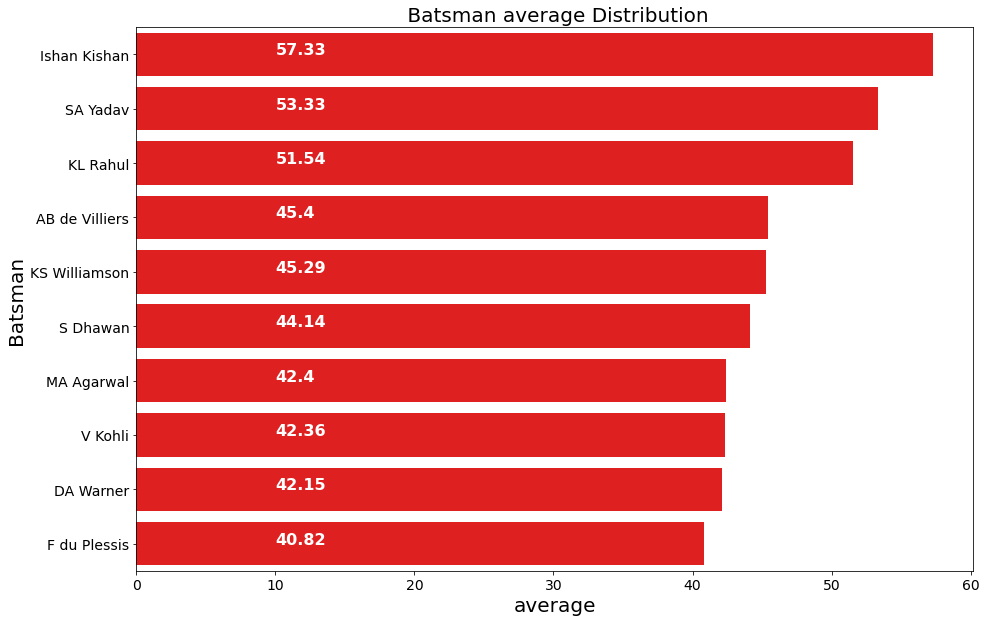

In [45]:
batsman_all_stats = batsman_all_stats.sort_values(by ="average",ascending =False)
xlabel_name = "average"
ylabel_name = "Batsman"
title_name = " Batsman average Distribution"

sns.barplot( x = "average" , y = "batsman" , data = batsman_all_stats.head(10), color = "red")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["average"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')

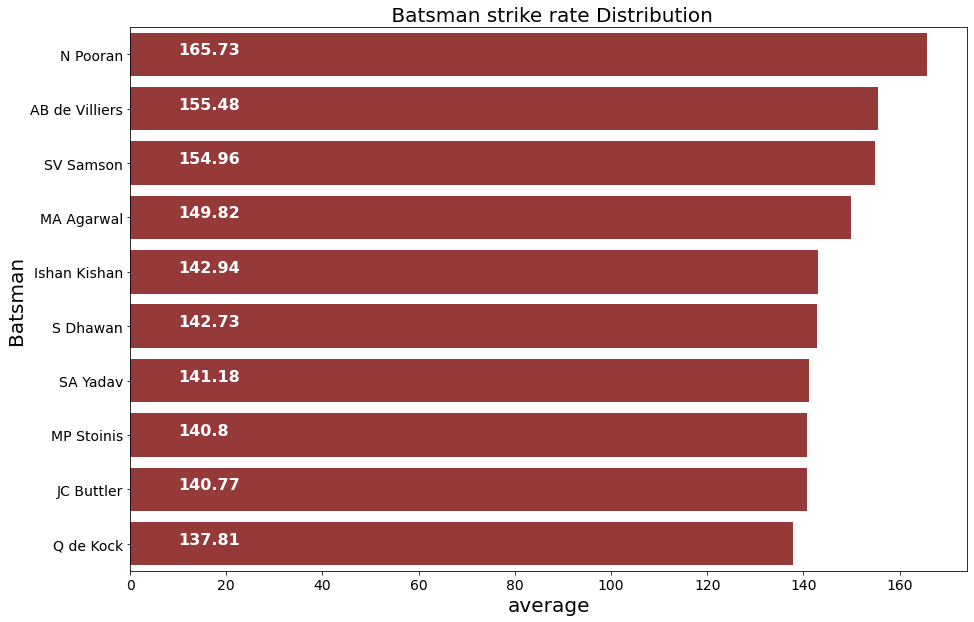

In [46]:
batsman_all_stats = batsman_all_stats.sort_values(by ="strike_rate",ascending =False)
xlabel_name = "average"
ylabel_name = "Batsman"
title_name = " Batsman strike rate Distribution"

sns.barplot( x = "strike_rate" , y = "batsman" , data = batsman_all_stats.head(10), color = "brown")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["strike_rate"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')

# PCA

In [47]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(batsman_all_stats_5), index=batsman_all_stats_5.index, columns=batsman_all_stats_5.columns)

In [48]:
X

,batsman_runs,batsman_fours,batsman_six,average,strike_rate
batsman,,,,,
KL Rahul,3.185123,2.979345,2.370099,1.565756,0.530345
S Dhawan,2.873116,3.561024,1.013717,1.186127,0.878648
DA Warner,2.453107,2.591559,1.149355,1.084038,0.581980
SS Iyer,2.279103,1.815986,1.420632,0.585903,0.351468
Ishan Kishan,2.261102,1.557462,3.319566,1.862791,0.883489
...,...,...,...,...,...
SS Cottrell,-0.834966,-0.769255,-0.749579,-1.078310,-2.411446
B Kumar,-0.834966,-0.769255,-0.749579,-1.078310,-2.411446
Arshdeep Singh,-0.834966,-0.769255,-0.749579,-1.078310,-2.411446


In [49]:
from sklearn.decomposition import PCA

In [50]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4','PC5'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4,PC5
batsman,,,,,
KL Rahul,4.960797,-1.615697,0.328576,-0.123203,0.169145
S Dhawan,4.418961,-1.406854,0.300123,-1.595412,-0.019256
DA Warner,3.659397,-1.167770,0.289020,-0.840868,0.152637
SS Iyer,3.043568,-1.230444,-0.108805,-0.199568,0.384912
Ishan Kishan,4.516655,-0.531715,0.037194,1.457310,-0.017370


In [51]:
df_plot = df_plot.reset_index()

In [52]:
df_plot.sort_values(by = 'PC1',ascending = False).head(10)

,batsman,PC1,PC2,PC3,PC4,PC5
0,KL Rahul,4.960797,-1.615697,0.328576,-0.123203,0.169145
4,Ishan Kishan,4.516655,-0.531715,0.037194,1.457310,-0.017370
1,S Dhawan,4.418961,-1.406854,0.300123,-1.595412,-0.019256
6,SA Yadav,3.868474,-0.753713,0.776625,-1.403708,-0.393023
5,Q de Kock,3.787240,-1.115327,-0.406379,0.138111,-0.121344
2,DA Warner,3.659397,-1.167770,0.289020,-0.840868,0.152637
9,AB de Villiers,3.650916,-0.212155,-0.310713,0.712845,0.075966
13,MA Agarwal,3.278499,-0.397712,0.009595,-0.478766,-0.169677
14,EJG Morgan,3.238133,-0.655892,-0.395363,0.949320,-0.093802
10,F du Plessis,3.082143,-0.631963,0.135394,-0.460775,0.052356


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

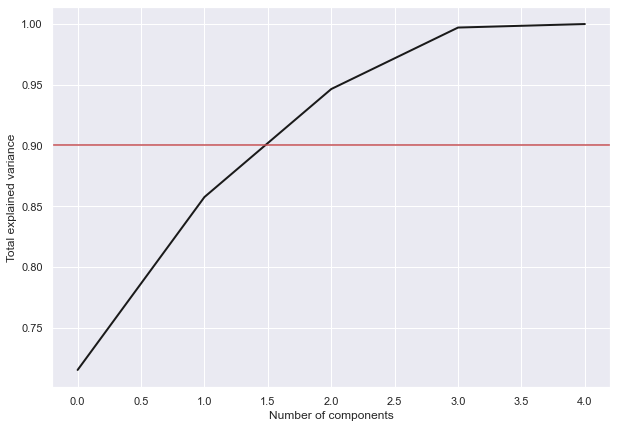

In [54]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.9, c='r')
plt.show();

In [55]:
batsman_thirty = all_data.groupby(["batsman","match_no"])["runs_batsman"].sum()

In [56]:
batsman_thirty = batsman_thirty.reset_index(name = "thirty")
batsman_thirty

,batsman,match_no,thirty
0,A Nortje,1216493,3
1,A Nortje,1216524,1
2,A Nortje,1216532,3
3,AB de Villiers,1216499,15
4,AB de Villiers,1216502,24
...,...,...,...
863,YBK Jaiswal,1216496,6
864,YBK Jaiswal,1216500,34
865,YBK Jaiswal,1216511,0
866,YS Chahal,1216510,1


In [57]:
batsman_thirty_players = batsman_thirty[(batsman_thirty["thirty"] >= 30) & 
                                          (batsman_thirty["thirty"] < 50)]

In [58]:
batsman_thirty_players = batsman_thirty_players.groupby("batsman")["batsman"].count()
batsman_thirty_players

batsman
AB de Villiers       2
AJ Finch             2
AR Patel             1
AT Rayudu            7
Abdul Samad          1
Abhishek Sharma      1
BA Stokes            2
D Padikkal           3
DA Warner            5
EJG Morgan           7
F du Plessis         2
GJ Maxwell           1
HH Pandya            3
Ishan Kishan         4
JC Buttler           1
JM Bairstow          1
JR Philippe          2
KA Pollard           3
KD Karthik           1
KH Pandya            1
KL Rahul             1
KS Williamson        1
MA Agarwal           1
MK Lomror            1
MK Pandey            3
MP Stoinis           2
MS Dhoni             1
N Jagadeesan         1
N Pooran             3
PJ Cummins           1
PP Shaw              1
Q de Kock            3
R Parag              1
R Tewatia            3
RA Jadeja            3
RA Tripathi          2
RG Sharma            2
RR Pant              5
RV Uthappa           3
S Dhawan             3
SA Yadav             3
SM Curran            1
SO Hetmyer           2
SPD

In [59]:
batsman_thirty_players = batsman_thirty_players.reset_index(name = "thirty")

In [60]:
batsman_thirty_players

,batsman,thirty
0,AB de Villiers,2
1,AJ Finch,2
2,AR Patel,1
3,AT Rayudu,7
4,Abdul Samad,1
5,Abhishek Sharma,1
6,BA Stokes,2
7,D Padikkal,3
8,DA Warner,5
9,EJG Morgan,7


In [61]:
batsman_fifty = all_data.groupby(["batsman","match_no"])["runs_batsman"].sum()

batsman_fifty = batsman_fifty.reset_index(name = "fifty")
batsman_fifty_players = batsman_fifty[(batsman_fifty["fifty"] >= 50) & 
                                          (batsman_fifty["fifty"] < 100)]
batsman_fifty_players = batsman_fifty_players.groupby("batsman")["batsman"].count()
batsman_fifty_players = batsman_fifty_players.reset_index(name = "fifty")

In [62]:
batsman_fifty_players

,batsman,fifty
0,AB de Villiers,5
1,AJ Finch,1
2,AM Rahane,1
3,AT Rayudu,1
4,BA Stokes,1
5,CH Gayle,3
6,D Padikkal,5
7,DA Warner,4
8,DJ Hooda,1
9,EJG Morgan,1


In [63]:
batsman_century = all_data.groupby(["batsman","match_no"])["runs_batsman"].sum()

In [64]:
batsman_century = batsman_century.reset_index(name = "century")
batsman_century

,batsman,match_no,century
0,A Nortje,1216493,3
1,A Nortje,1216524,1
2,A Nortje,1216532,3
3,AB de Villiers,1216499,15
4,AB de Villiers,1216502,24
...,...,...,...
863,YBK Jaiswal,1216496,6
864,YBK Jaiswal,1216500,34
865,YBK Jaiswal,1216511,0
866,YS Chahal,1216510,1


In [65]:
batsman_century = batsman_century[(batsman_century["century"] >= 100)]

In [66]:
batsman_century = batsman_century.groupby("batsman")["batsman"].count()
batsman_century = batsman_century.reset_index(name = "century")

In [67]:
batsman_century

,batsman,century
0,BA Stokes,1
1,KL Rahul,1
2,MA Agarwal,1
3,S Dhawan,2


In [68]:
batsman_all_stats = batsman_all_stats.merge(batsman_thirty_players,how="left")

In [69]:
batsman_all_stats

,batsman,batsman_runs,batsman_matches,batsman_fours,batsman_six,deliveries,player_out,average,strike_rate,thirty
0,N Pooran,353,14,23.0,25.0,213,11,32.09,165.73,3.0
1,AB de Villiers,454,14,33.0,23.0,292,10,45.40,155.48,2.0
2,SV Samson,375,14,21.0,26.0,242,12,31.25,154.96,2.0
3,MA Agarwal,424,11,44.0,15.0,283,10,42.40,149.82,1.0
4,Ishan Kishan,516,13,36.0,30.0,361,9,57.33,142.94,4.0
5,S Dhawan,618,17,67.0,13.0,433,14,44.14,142.73,3.0
6,SA Yadav,480,15,61.0,11.0,340,9,53.33,141.18,3.0
7,MP Stoinis,352,17,31.0,16.0,250,15,23.47,140.80,2.0
8,JC Buttler,328,12,27.0,16.0,233,11,29.82,140.77,1.0
9,Q de Kock,503,16,46.0,22.0,365,14,35.93,137.81,3.0


In [70]:
batsman_all_stats =batsman_all_stats.merge(batsman_fifty_players,how="left")
batsman_all_stats =batsman_all_stats.merge(batsman_century,how="left")

In [71]:
batsman_all_stats

,batsman,batsman_runs,batsman_matches,batsman_fours,batsman_six,deliveries,player_out,average,strike_rate,thirty,fifty,century
0,N Pooran,353,14,23.0,25.0,213,11,32.09,165.73,3.0,2,NaN
1,AB de Villiers,454,14,33.0,23.0,292,10,45.40,155.48,2.0,5,NaN
2,SV Samson,375,14,21.0,26.0,242,12,31.25,154.96,2.0,3,NaN
3,MA Agarwal,424,11,44.0,15.0,283,10,42.40,149.82,1.0,2,1.0
4,Ishan Kishan,516,13,36.0,30.0,361,9,57.33,142.94,4.0,4,NaN
5,S Dhawan,618,17,67.0,13.0,433,14,44.14,142.73,3.0,4,2.0
6,SA Yadav,480,15,61.0,11.0,340,9,53.33,141.18,3.0,4,NaN
7,MP Stoinis,352,17,31.0,16.0,250,15,23.47,140.80,2.0,3,NaN
8,JC Buttler,328,12,27.0,16.0,233,11,29.82,140.77,1.0,2,NaN
9,Q de Kock,503,16,46.0,22.0,365,14,35.93,137.81,3.0,4,NaN


In [72]:
batsman_all_stats = batsman_all_stats.fillna(0)

In [73]:
batsman_all_stats

,batsman,batsman_runs,batsman_matches,batsman_fours,batsman_six,deliveries,player_out,average,strike_rate,thirty,fifty,century
0,N Pooran,353,14,23.0,25.0,213,11,32.09,165.73,3.0,2,0.0
1,AB de Villiers,454,14,33.0,23.0,292,10,45.40,155.48,2.0,5,0.0
2,SV Samson,375,14,21.0,26.0,242,12,31.25,154.96,2.0,3,0.0
3,MA Agarwal,424,11,44.0,15.0,283,10,42.40,149.82,1.0,2,1.0
4,Ishan Kishan,516,13,36.0,30.0,361,9,57.33,142.94,4.0,4,0.0
5,S Dhawan,618,17,67.0,13.0,433,14,44.14,142.73,3.0,4,2.0
6,SA Yadav,480,15,61.0,11.0,340,9,53.33,141.18,3.0,4,0.0
7,MP Stoinis,352,17,31.0,16.0,250,15,23.47,140.80,2.0,3,0.0
8,JC Buttler,328,12,27.0,16.0,233,11,29.82,140.77,1.0,2,0.0
9,Q de Kock,503,16,46.0,22.0,365,14,35.93,137.81,3.0,4,0.0


In [74]:
batsman_all_stats["CHT"] = 2*batsman_all_stats["century"]+ 1.5*batsman_all_stats["fifty"] + batsman_all_stats["thirty"]

In [75]:
batsman_all_stats.columns

Index(['batsman', 'batsman_runs', 'batsman_matches', 'batsman_fours',
       'batsman_six', 'deliveries', 'player_out', 'average', 'strike_rate',
       'thirty', 'fifty', 'century', 'CHT'],
      dtype='object')

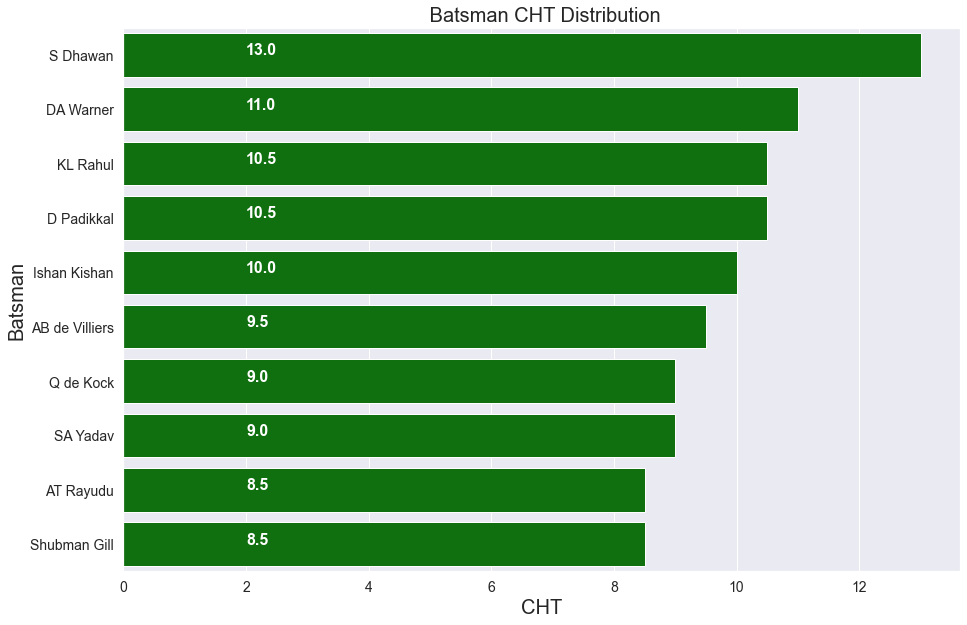

In [76]:
batsman_all_stats = batsman_all_stats.sort_values(by ="CHT",ascending =False)
xlabel_name = "CHT"
ylabel_name = "Batsman"
title_name = " Batsman CHT Distribution"

sns.barplot( x = "CHT" , y = "batsman" , data = batsman_all_stats.head(10), color = "green")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["CHT"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

# PCA again

In [77]:
batsman_all_stats = batsman_all_stats[batsman_all_stats["batsman_runs"] >= 300]

In [78]:
batsman_all_stats

,batsman,batsman_runs,batsman_matches,batsman_fours,batsman_six,deliveries,player_out,average,strike_rate,thirty,fifty,century,CHT
5,S Dhawan,618,17,67.0,13.0,433,14,44.14,142.73,3.0,4,2.0,13.0
14,DA Warner,548,16,52.0,14.0,422,13,42.15,129.86,5.0,4,0.0,11.0
15,KL Rahul,670,14,58.0,23.0,525,13,51.54,127.62,1.0,5,1.0,10.5
22,D Padikkal,473,15,51.0,8.0,398,14,33.79,118.84,3.0,5,0.0,10.5
4,Ishan Kishan,516,13,36.0,30.0,361,9,57.33,142.94,4.0,4,0.0,10.0
1,AB de Villiers,454,14,33.0,23.0,292,10,45.40,155.48,2.0,5,0.0,9.5
9,Q de Kock,503,16,46.0,22.0,365,14,35.93,137.81,3.0,4,0.0,9.0
6,SA Yadav,480,15,61.0,11.0,340,9,53.33,141.18,3.0,4,0.0,9.0
17,AT Rayudu,359,11,30.0,12.0,289,9,39.89,124.22,7.0,1,0.0,8.5
24,Shubman Gill,440,14,44.0,9.0,382,13,33.85,115.18,4.0,3,0.0,8.5


In [79]:
batsman_all_stats_6 = batsman_all_stats[['batsman_runs', 'batsman_fours',
       'batsman_six', 'average', 'strike_rate',"CHT"]]

In [80]:
batsman_all_stats_6.index = batsman_all_stats["batsman"]

In [81]:
batsman_all_stats_6

,batsman_runs,batsman_fours,batsman_six,average,strike_rate,CHT
batsman,,,,,,
S Dhawan,618,67.0,13.0,44.14,142.73,13.0
DA Warner,548,52.0,14.0,42.15,129.86,11.0
KL Rahul,670,58.0,23.0,51.54,127.62,10.5
D Padikkal,473,51.0,8.0,33.79,118.84,10.5
Ishan Kishan,516,36.0,30.0,57.33,142.94,10.0
AB de Villiers,454,33.0,23.0,45.40,155.48,9.5
Q de Kock,503,46.0,22.0,35.93,137.81,9.0
SA Yadav,480,61.0,11.0,53.33,141.18,9.0
AT Rayudu,359,30.0,12.0,39.89,124.22,8.5


In [82]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(batsman_all_stats_6), index=batsman_all_stats_6.index, columns=batsman_all_stats_6.columns)

In [83]:
X

,batsman_runs,batsman_fours,batsman_six,average,strike_rate,CHT
batsman,,,,,,
S Dhawan,2.037371,2.418270,-0.510685,0.783671,0.701526,2.435125
DA Warner,1.280324,1.169097,-0.344712,0.562682,-0.237828,1.500612
KL Rahul,2.599748,1.668766,1.149040,1.605442,-0.401321,1.266984
D Padikkal,0.469203,1.085819,-1.340547,-0.365696,-1.042154,1.266984
Ishan Kishan,0.934245,-0.163353,2.310848,2.248421,0.716853,1.033356
AB de Villiers,0.263718,-0.413188,1.149040,0.923595,1.632121,0.799727
Q de Kock,0.793651,0.669428,0.983068,-0.128049,0.342425,0.566099
SA Yadav,0.544907,1.918601,-0.842629,1.804221,0.588394,0.566099
AT Rayudu,-0.763702,-0.663022,-0.676657,0.311709,-0.649480,0.332471


In [84]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4','PC5','PC6'], index=X.index)
df_plot.head(15)

,PC1,PC2,PC3,PC4,PC5,PC6
batsman,,,,,,
S Dhawan,3.840034,-0.631662,1.054557,-0.742712,-0.690877,0.099702
DA Warner,2.227398,-0.757995,0.040460,-0.299616,-0.338373,0.089951
KL Rahul,3.671780,0.161449,-0.678000,-0.313066,1.051946,0.187599
D Padikkal,1.059967,-2.047290,0.155574,-0.515298,-0.632069,-0.130828
Ishan Kishan,2.262462,2.323576,-1.200093,0.839053,0.266579,-0.378921
AB de Villiers,0.993383,2.041664,0.038534,0.349199,-0.659946,0.053104
Q de Kock,1.103423,0.643932,-0.088577,-0.896406,0.200462,-0.121629
SA Yadav,2.233026,-0.481777,1.435157,1.056451,0.267465,-0.379542
AT Rayudu,-0.516961,-0.680096,-0.476845,0.801849,-0.670254,-0.246711


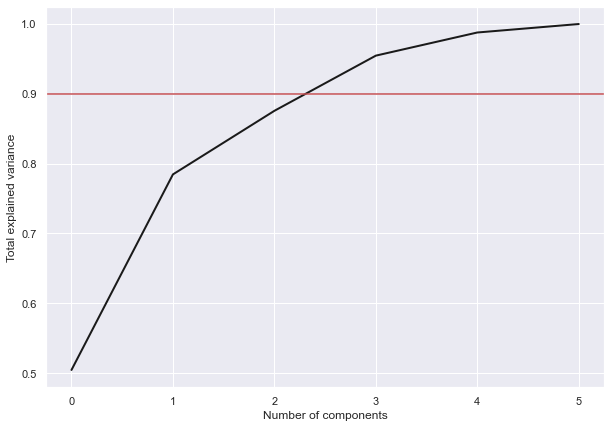

In [85]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.9, c='r')
plt.show();

In [86]:
df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by = ["PC1","PC2"],ascending = False)

In [87]:
df_plot.head(20)

,batsman,PC1,PC2,PC3,PC4,PC5,PC6
0,S Dhawan,3.840034,-0.631662,1.054557,-0.742712,-0.690877,0.099702
2,KL Rahul,3.671780,0.161449,-0.678000,-0.313066,1.051946,0.187599
4,Ishan Kishan,2.262462,2.323576,-1.200093,0.839053,0.266579,-0.378921
7,SA Yadav,2.233026,-0.481777,1.435157,1.056451,0.267465,-0.379542
1,DA Warner,2.227398,-0.757995,0.040460,-0.299616,-0.338373,0.089951
6,Q de Kock,1.103423,0.643932,-0.088577,-0.896406,0.200462,-0.121629
3,D Padikkal,1.059967,-2.047290,0.155574,-0.515298,-0.632069,-0.130828
5,AB de Villiers,0.993383,2.041664,0.038534,0.349199,-0.659946,0.053104
12,F du Plessis,0.484822,-0.113659,0.407275,0.303074,-0.007458,0.109338
13,SS Iyer,0.251301,-0.780386,-0.604801,-0.711305,0.613988,0.512911


In [88]:
df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by = ["PC1","PC2","PC3"],ascending = False)

In [89]:
df_plot.head(20)

,index,batsman,PC1,PC2,PC3,PC4,PC5,PC6
0,0,S Dhawan,3.840034,-0.631662,1.054557,-0.742712,-0.690877,0.099702
1,2,KL Rahul,3.671780,0.161449,-0.678000,-0.313066,1.051946,0.187599
2,4,Ishan Kishan,2.262462,2.323576,-1.200093,0.839053,0.266579,-0.378921
3,7,SA Yadav,2.233026,-0.481777,1.435157,1.056451,0.267465,-0.379542
4,1,DA Warner,2.227398,-0.757995,0.040460,-0.299616,-0.338373,0.089951
5,6,Q de Kock,1.103423,0.643932,-0.088577,-0.896406,0.200462,-0.121629
6,3,D Padikkal,1.059967,-2.047290,0.155574,-0.515298,-0.632069,-0.130828
7,5,AB de Villiers,0.993383,2.041664,0.038534,0.349199,-0.659946,0.053104
8,12,F du Plessis,0.484822,-0.113659,0.407275,0.303074,-0.007458,0.109338
9,13,SS Iyer,0.251301,-0.780386,-0.604801,-0.711305,0.613988,0.512911
